# Вопрос по выбору
Воробьев Кирилл Максимович 
Б05-402

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [54]:
# --- 1. ФИЗИЧЕСКИЕ КОНСТАНТЫ И ПАРАМЕТРЫ ---
q = 1.0       # Заряд частицы (условные единицы)
m = 1.0       # Масса частицы
E_mag = 15.0   # Напряженность электрического поля (вдоль Y)
B_mag = 5.0   # Индукция магнитного поля (вдоль Z)

In [55]:
# Теоретическая скорость дрейфа (E/B)
v_drift_theory = E_mag / B_mag
print(f"Теоретическая скорость дрейфа: {v_drift_theory:.3f}")

Теоретическая скорость дрейфа: 3.000


In [56]:
# --- 2. ОПИСАНИЕ СИСТЕМЫ ДИФФЕРЕНЦИАЛЬНЫХ УРАВНЕНИЙ ---
# Состояние системы описывается вектором S = [x, y, vx, vy]
# Нам нужно найти производную dS/dt = [vx, vy, ax, ay]

def motion_equations(S, t):
    x, y, vx, vy = S
    
    # Векторы полей
    E = np.array([0, E_mag, 0])     # E направлено по Y
    B = np.array([0, 0, B_mag])     # B направлено по Z
    
    # Вектор скорости (добавляем 0 для z-компоненты)
    v = np.array([vx, vy, 0])
    
    # Сила Лоренца: F = q * (E + [v x B])
    # Используем векторное произведение np.cross
    F_lorentz = q * (E + np.cross(v, B))
    
    # Второй закон Ньютона: a = F / m
    ax = F_lorentz[0] / m
    ay = F_lorentz[1] / m
    
    # Возвращаем производные: [dx/dt, dy/dt, dvx/dt, dvy/dt]
    return [vx, vy, ax, ay]

In [59]:
# --- 3. НАЧАЛЬНЫЕ УСЛОВИЯ И ЗАПУСК ---
# Начальное состояние: [x=0, y=0, vx=0, vy=0] (покой)
state0 = [0, 0, 0, 0]

# Время моделирования
t = np.linspace(0, 20, 1000)

# Решаем уравнение численно
solution = odeint(motion_equations, state0, t)

# Извлекаем координаты из решения
x_sol = solution[:, 0]
y_sol = solution[:, 1]

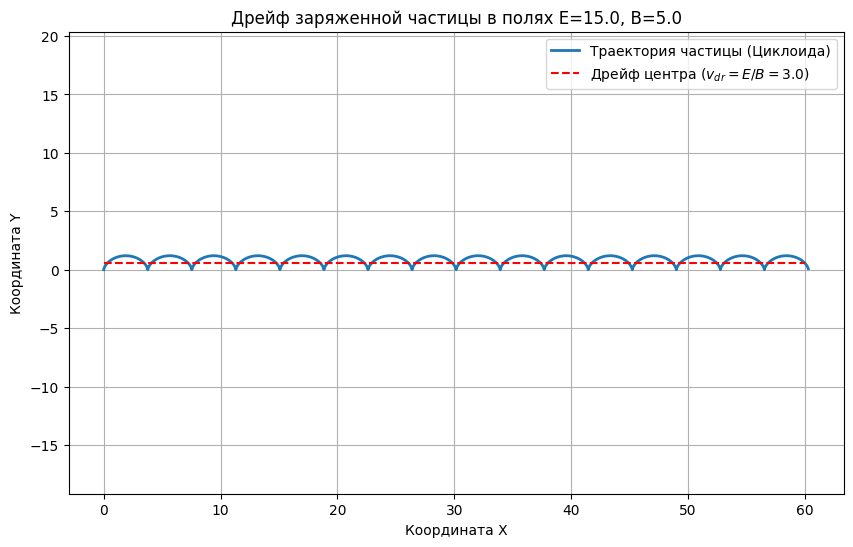

In [60]:
# --- 4. ВИЗУАЛИЗАЦИЯ ---
plt.figure(figsize=(10, 6))
plt.title(f'Дрейф заряженной частицы в полях E={E_mag}, B={B_mag}')

# Рисуем траекторию
plt.plot(x_sol, y_sol, label='Траектория частицы (Циклоида)', linewidth=2)

# Рисуем линию теоретического дрейфа для наглядности
# Частица дрейфует со средней скоростью v = E/B вдоль оси X
y_mean = np.mean(y_sol) # Средняя высота
plt.plot(t * v_drift_theory, [y_mean]*len(t), 'r--', label=f'Дрейф центра ($v_{{dr}} = E/B = {v_drift_theory}$)')

plt.xlabel('Координата X')
plt.ylabel('Координата Y')
plt.legend()
plt.grid(True)
plt.axis('equal') # Чтобы круги не выглядели овалами
plt.show()